In [2]:
%pdb

Automatic pdb calling has been turned OFF


In [3]:
import RSA_Code
import numpy as np
import random
import sys

import time
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

## Time Comparison for Prime Number Generator

In [4]:
simple_time = []
MR_time = []
bit_lengths = []

In [5]:
t_all = time.time()

for n_sample in range(0, 100):
    
    d = random.randint(8, 65)

    print(str(d) + " bits")
    sys.stdout.flush()

    
    t_start = time.time()
    RSA_Code.random_prime(d = d, mode = 'simple')
    simple_time.append(time.time() - t_start)

    t_start = time.time()
    RSA_Code.random_prime(d = d, mode = 'MR', k = 100)
    MR_time.append(time.time() - t_start)   
    
    bit_lengths.append(d)
    
    dat = np.asarray([bit_lengths, simple_time, MR_time])
    np.savetxt('png_data.csv', dat, delimiter=',')
    
print(time.time() - t_all)

8 bits
26 bits
47 bits
54 bits
39 bits
46 bits
27 bits
17 bits
64 bits
9 bits
15 bits
51 bits
60 bits
46 bits
22 bits
35 bits
12 bits
14 bits
15 bits
38 bits
61 bits
42 bits
30 bits
61 bits
47 bits
34 bits
60 bits
14 bits
42 bits
52 bits
59 bits
56 bits
22 bits
34 bits
28 bits
19 bits
59 bits
30 bits
27 bits
48 bits
20 bits
43 bits
26 bits
21 bits
60 bits
18 bits
45 bits
56 bits
15 bits
50 bits
57 bits
45 bits
9 bits
40 bits
30 bits
42 bits
52 bits
20 bits
43 bits
65 bits
17 bits
16 bits
62 bits
31 bits
9 bits
10 bits
15 bits
32 bits
53 bits
57 bits
33 bits
29 bits
62 bits
57 bits
27 bits
53 bits
13 bits
34 bits
18 bits
32 bits
27 bits
39 bits
61 bits
14 bits
49 bits
52 bits
44 bits
47 bits
20 bits
28 bits
16 bits
37 bits
15 bits
24 bits
16 bits
38 bits
34 bits
20 bits
9 bits
60 bits
741.9044442176819


In [8]:
dat

array([list([29]),
       list([5.118038654327393, 0.037757158279418945, 0.0005004405975341797]),
       list([0.0037047863006591797, 0.002790689468383789, 0.0014657974243164062])],
      dtype=object)

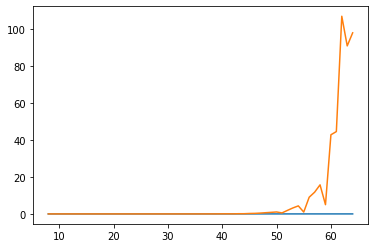

In [11]:
dat = np.loadtxt('shor_data.csv', delimiter=',')

plt.plot(dat[0], dat[1], 'o')
plt.plot(dat[0], dat[2], 'o')

## Time Comparison for exponentiation operation

In [ ]:
normal_time = []
fast_time = []
fast_mod_time = []

for b in range(8, 1024):
    t_all = time.time()

    base = random.randint(2**(b-1), 2**b - 1)
    mod_base = random.randint(2**(b-1), 2**b - 1)
    power = random.randint(0, mod_base - 1)
    
#     t_start = time.time()
#     dummy = base ** power % mod_base
#     normal_time.append(time.time() - t_start)
    
    t_start = time.time()
    dummy = RSA_Code.fast_expontiation(base, power, 1) % mod_base
    fast_time.append(time.time() - t_start)
    
    t_start = time.time()
    dummy = RSA_Code.fast_expontiation(base, power, mod_base)
    fast_mod_time.append(time.time() - t_start)
    
    print(str(b) + ' bits: ' + str(time.time() - t_all))

print(time.time() = t_all)

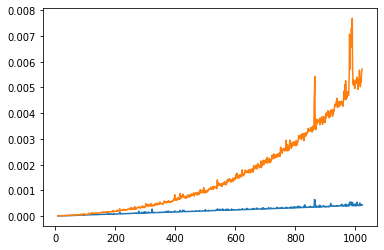

In [39]:
# plt.plot(np.arange(8, 24), normal_time)
plt.plot(np.arange(8, 1024), fast_time)
plt.plot(np.arange(8, 1024), fast_mod_time)